In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_excel('data.xlsx', skiprows=1)
T = df['T, c']
n = df['n']

In [70]:
def plot_linear(x, y, xerr, yerr, xlabel, ylabel, file):
  plt.figure(figsize=(7, 4))
  plt.errorbar(x, y, fmt='b.', xerr=xerr, yerr=yerr)
  res = stats.linregress(x, y)
  print(res.intercept, res.slope)

  z = np.linspace(min(x), max(x), 1000)
  plt.plot(z, res.slope * z + res.intercept, color='blue')

  plt.grid(which='major', linestyle='-')
  plt.grid(which='minor', linestyle='--')
  plt.minorticks_on()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.savefig(file)

  return res

0.27200000000000024 0.30016666666666664


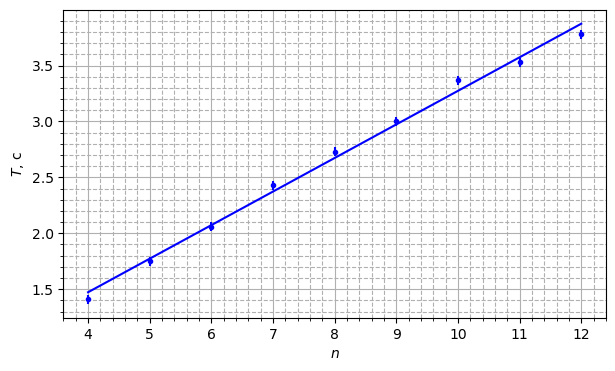

In [71]:
n = n[~np.isnan(n)]
T = T[~np.isnan(T)]

# print(n)
# print(T)

res = plot_linear(x=n, y=T, xerr=0, yerr=0.04, xlabel='$n$', ylabel='$T$, c', file='graph.pdf')

In [72]:
B_par = np.pi**2 * 8.27 * 0.63**2 / (3 * res.slope**2 * 57 * 10) - 1.7 / (57 * 10)
B_par

np.float64(0.20728173584401843)

In [73]:
df = pd.read_excel('data.xlsx', sheet_name='task3')

N, d, m = df['N'], df['d, шар'], df['m, г']

In [74]:
g = 981

M = [m[i] * g * d[i] * 0.63 for i in range(len(m))]

-176.88018599999998 70.208208


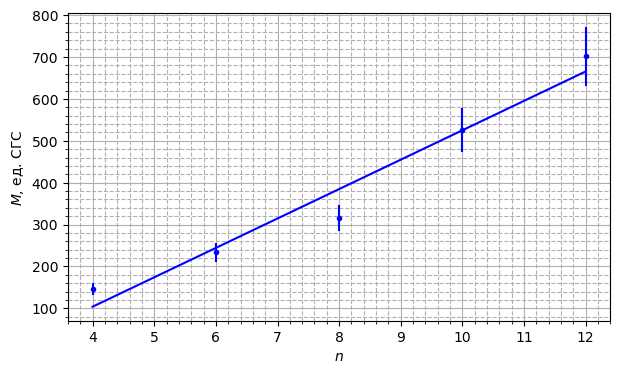

In [75]:
res = plot_linear(x=N, y=M, xerr=0, yerr=[0.1 * m for m in M], xlabel='$n$', ylabel='$M$, ед. СГС', file='moment.pdf')

In [76]:
# df['M, ед. СГС'] = M
# df.to_excel('data.xlsx', sheet_name='task3')

In [77]:
B_perp = res.slope